In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [8]:
!ls

Data                    Penguins.py             pages
Images                  Streamlit_Example.ipynb penguin_dt.pkl


In [9]:
list(df.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [10]:
df.to_csv('./Data/penguins.csv')

In [11]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [12]:
df['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


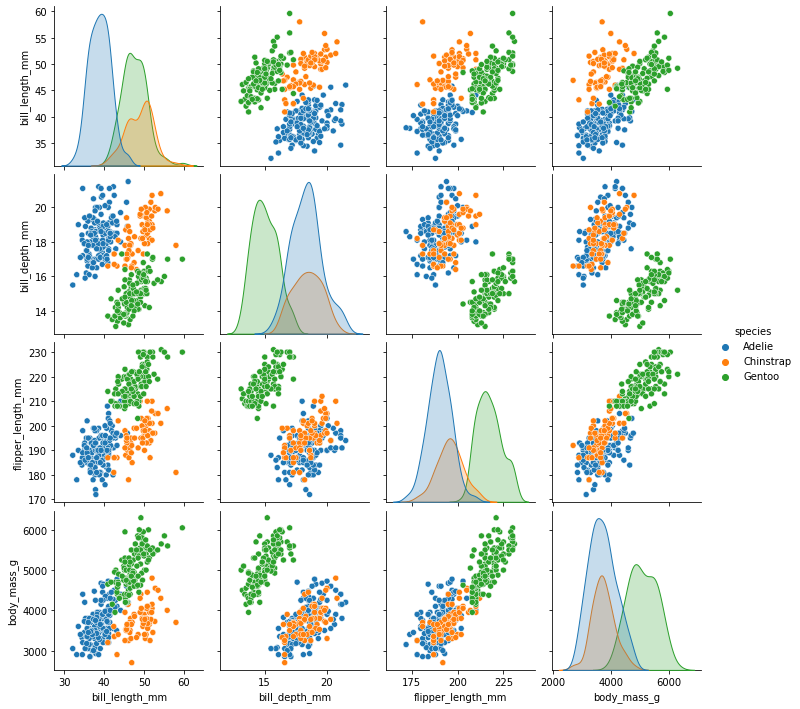

In [13]:
sns.pairplot(df.drop(columns=['sex']), hue='species');

In [14]:
X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [15]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
27,Biscoe,40.5,17.9,187.0,3200.0,1
292,Biscoe,48.2,15.6,221.0,5100.0,0
302,Biscoe,47.4,14.6,212.0,4725.0,1
62,Biscoe,37.6,17.0,185.0,3600.0,1
181,Dream,52.8,20.0,205.0,4550.0,0


In [16]:
subpipe_num = Pipeline(steps=[('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore'))])

CT = ColumnTransformer(transformers=[('num', subpipe_num, [1,2,3,4]),
                                    ('cat', subpipe_cat, [0])], remainder='passthrough')

In [17]:
test = CT.fit_transform(X_train)

In [18]:
test.shape

(233, 8)

In [19]:
dt_pipe = Pipeline(steps=[('ct', CT),
                         ('dt', DecisionTreeClassifier(random_state=42, max_depth=4))])

In [20]:
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0])])),
                ('dt', DecisionTreeClassifier(max_depth=4, random_state=42))])

In [21]:
dt_pipe.score(X_train, y_train)

0.9957081545064378

In [22]:
dt_pipe.score(X_test, y_test)

0.98

In [23]:
CT.fit_transform(X).shape

(333, 8)

In [24]:
dt_pipe.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0])])),
                ('dt', DecisionTreeClassifier(max_depth=4, random_state=42))])

Column order = bill_length, bill_depth, flipper_length, body_mass, island1, island2, island3, sex

In [25]:
model_file = open('penguin_dt.pkl', 'wb')
joblib.dump(dt_pipe, model_file)
model_file.close()

In [26]:
test = X.loc[0]
test

island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                          0
Name: 0, dtype: object

In [55]:
new_input = np.array(['Biscoe', 49.9, 16.1, 213, 5400, 0])
new_input

array(['Biscoe', '49.9', '16.1', '213', '5400', '0'], dtype='<U32')

In [45]:
dt_pipe.predict(new_input.reshape(1,-1))

/opt/anaconda3/envs/streamlit_example/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/streamlit_example/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but DecisionTreeClassifier is expecting 8 features as input.

In [46]:
X.loc[343]

island               Biscoe
bill_length_mm         49.9
bill_depth_mm          16.1
flipper_length_mm     213.0
body_mass_g          5400.0
sex                       0
Name: 343, dtype: object

In [47]:
X.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [60]:
new_x = pd.DataFrame(new_input.reshape(1,-1), columns=dt_pipe.feature_names_in_)
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   island             1 non-null      object
 1   bill_length_mm     1 non-null      object
 2   bill_depth_mm      1 non-null      object
 3   flipper_length_mm  1 non-null      object
 4   body_mass_g        1 non-null      object
 5   sex                1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


In [57]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,0
1,Torgersen,39.5,17.4,186.0,3800.0,1
2,Torgersen,40.3,18.0,195.0,3250.0,1
4,Torgersen,36.7,19.3,193.0,3450.0,1
5,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,1
340,Biscoe,46.8,14.3,215.0,4850.0,1
341,Biscoe,50.4,15.7,222.0,5750.0,0
342,Biscoe,45.2,14.8,212.0,5200.0,1


In [58]:
CT.fit_transform(X).shape

(333, 8)

In [59]:
CT.transform(new_x)

array([[1.0818167319533956, -0.5415641710075221, 0.8598275725410321,
        1.483749064597852, 1.0, 0.0, 0.0, '0']], dtype=object)

In [ ]:
dt_pipe.predict(new_input.reshape(1,-1))

In [ ]:
dt_pipe.feature_names_in_

In [63]:
dt_pipe.predict(new_x)

array(['Gentoo'], dtype=object)

In [ ]:
float(new_x['bill_length_mm'][0])

In [ ]:
CT.fit_transform(new_x).shape

In [64]:
y[343]

'Gentoo'